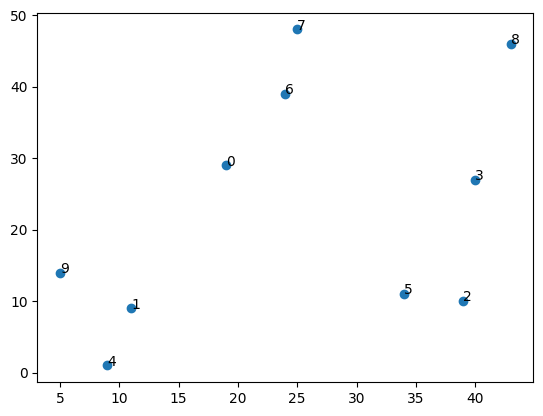

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np
import math
names = [str(i) for i in range(10)]
x = random.sample(range(0, 50), 10)
y = random.sample(range(0, 50), 10)
coords = list(zip(x, y))
plt.scatter(x, y)
for index, point in enumerate(coords):
  plt.text(point[0], point[1], names[index])
plt.show()

In [ ]:

from itertools import combinations, cycle

def calculate_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

def tsp_dynamic_programming(points):
    num_points = len(points)

    dp = np.full((2**num_points, num_points), np.inf)
    path = np.zeros((2**num_points, num_points), dtype=int)
    # Инициализация базовых случаев
    dp[1][0] = 0


    for subset_size in range(2, num_points + 1):
        for subset in combinations(range(1, num_points), subset_size - 1):
            subset = (0,) + subset
            subset_index = sum(2**i for i in subset)
            for j in subset:
                if j == 0:
                    continue
                for k in subset:
                    if k == j:
                        continue
                    distance = dp[subset_index - 2**j][k] + calculate_distance(points[k], points[j])
                    if distance < dp[subset_index][j]:
                        dp[subset_index][j] = distance
                        path[subset_index][j] = k

    # Вычисление наименьшего пути через все точки
    min_distance = np.inf
    last_index = 2**num_points - 1
    last_point = None
    for j in range(1, num_points):
        distance = dp[last_index][j] + calculate_distance(points[j], points[0])
        if distance < min_distance:
            min_distance = distance
            last_point = j
    #print(path)
    # Восстановление пройденного пути
    best_path = [last_point]
    subset_index = last_index
    for _ in range(num_points - 1):
        prev_point = path[subset_index][last_point]
        best_path.append(prev_point)
        subset_index -= 2 ** last_point
        last_point = prev_point
    best_path = best_path[::-1]

    # Добавление исходной точки в конец пути
    best_path.append(0)
    min_distance += calculate_distance(points[last_point], points[0])

    return min_distance, best_path

# Создаем случайные точки на координатной плоскости
points = [np.array(i) for i in coords]
print(points)

min_distance, way = tsp_dynamic_programming(points)

print("Наименьший путь:", min_distance)
print("Путь:", way)

[array([19, 29]), array([11,  9]), array([39, 10]), array([40, 27]), array([9, 1]), array([34, 11]), array([24, 39]), array([25, 48]), array([43, 46]), array([ 5, 14])]
Наименьший путь: 143.2108547345994
Путь: [0, 9, 1, 4, 5, 2, 3, 8, 7, 6, 0]
